In [1]:
import numpy as np 
import math 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.special import softmax


#**Inputs**

$$ \{ \textbf{x}_i \}_{i=1}^n = \{ \textbf{x}_1, \textbf{x}_2, \dots, \textbf{x} _d \}; \textbf{x}_i \in R^{d} $$

$$ \textbf{x}_i \in R^{d} $$

$$ \textbf{X} \in R^{n \times d} $$

#**Self Attention**


\begin{align}
  \textbf{Q} = \textbf{X} \textbf{W}_Q^\top, \textbf{K} = \textbf{X} \textbf{W}_K^\top, \textbf{V} = \textbf{X} \textbf{W}_V^\top
\end{align}


$$\textbf{W}_Q \in R^{d_q \times n}, \textbf{W}_K \in R^{d_k \times n}, \textbf{W}_V \in R^{d_v \times n}$$


$$\textbf{Q} \in R^{n \times d_q}, \textbf{K} \in R^{n \times d_k}, \textbf{V} \in R^{m \times d_v}$$

In [3]:
n, d_q, d_k, d_v = 4, 8, 8, 8

Q = np.random.randn(n, d_q)
K = np.random.randn(n, d_k)
V = np.random.randn(n, d_v)



\begin{align}
  \textbf{H} = softmax \left( \frac{\textbf{Q} \textbf{K}^\top }{\sqrt{d_k}} \right) \textbf{V} 
\end{align}

\begin{align}
  \textbf{H} = \textbf{A} \textbf{V} 
\end{align}

$$ \textbf{H} \in R^{n \times d_v}, \textbf{A} \in R^{n \times n} $$


<h5 align="center"> $d_k$ mimize tha variance and stabilize the values of product Q  dot K transpose  </h5> 


In [4]:
Q.var(), K.var(), np.matmul(Q, K.T).var()

(1.1404649228633676, 0.9633338385664741, 5.314260866695225)

A
 [[-1.01901712 -0.7287755   1.1600544   0.49198762]
 [-0.84253925  0.57703082 -0.06271338  0.42139949]
 [-0.94231098  0.29514959  0.39051661  1.72367336]
 [ 1.44726876  0.15044936  0.04597542 -0.64004388]] 

0.6642826083369029


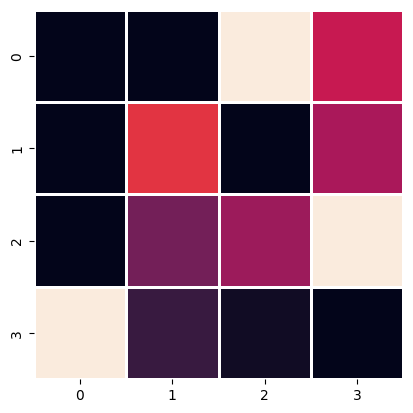

In [5]:
dot_softmax = np.matmul(Q, K.T) / math.sqrt(d_k)

print("A\n {} \n".format(dot_softmax))
print(dot_softmax.var())

plt.figure()
ax1 = sns.heatmap(dot_softmax, cbar=0, linewidths=2, vmax=1, vmin=0, square=True)
plt.show()


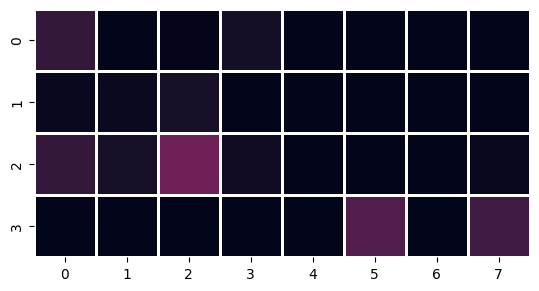

In [6]:
H_aux = np.matmul(softmax(dot_softmax), V)

plt.figure()
ax1 = sns.heatmap(H_aux, cbar=0, linewidths=2, vmax=1, vmin=0, square=True)
plt.show()


#**Masking**

In Transformers, masks are employed in attention mechanisms to regulate the importance of input sequence elements with respect to the output sequence elements.

In [10]:
mask = np.tril(np.ones((n,n)))

print(mask)

[[1. 0. 0. 0.]
 [1. 1. 0. 0.]
 [1. 1. 1. 0.]
 [1. 1. 1. 1.]]


In [11]:
mask[mask == 0] = -np.infty
mask[mask == 1] = 0

mask

array([[  0., -inf, -inf, -inf],
       [  0.,   0., -inf, -inf],
       [  0.,   0.,   0., -inf],
       [  0.,   0.,   0.,   0.]])

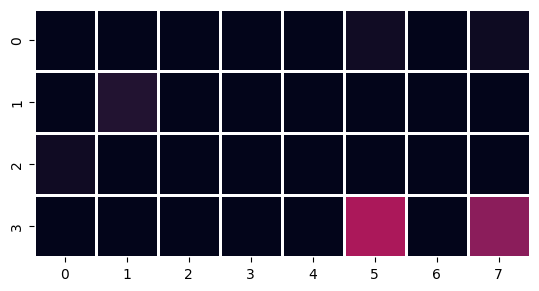

In [16]:
H = np.matmul(softmax(dot_softmax + mask), V) 

plt.figure()
ax1 = sns.heatmap(H, cbar=0, linewidths=2, vmax=1, vmin=0, square=True)
plt.show()

#**Function**

In [22]:
def scaled_dot_product_attention(Q, K, V, mask=None):
  
  d_k = Q.shape[-1]
  dot_softmax = np.matmul(Q, K.T) / math.sqrt(d_k)
  
  if mask is not None:
    dot_softmax = dot_softmax + mask
  
  A = softmax(dot_softmax)
  H = np.matmul(A, V)
  
  return H, A

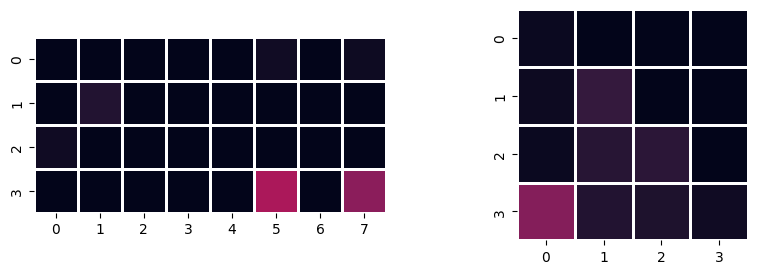

In [30]:
H, A = scaled_dot_product_attention(Q, K, V, mask=mask)

plt.figure(figsize=(10,3))
plt.subplot(1, 2, 1)
ax1 = sns.heatmap(H, cbar=0, linewidths=2, vmax=1, vmin=0, square=True)
plt.subplot(1, 2, 2)
ax2 = sns.heatmap(A, cbar=0, linewidths=2, vmax=1, vmin=0, square=True)
plt.show()